In [104]:
! pip3 install curl
! pip3 install scikit-plot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
import time
import numpy as np

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [105]:
columns = ['age','workclass','fnlwgt','education','education_num','marital_status',
           'occupation','relationship','race','sex','capital_gain','capital_loss',
           'hours_per_week','native_country','income']
dataset = pd.read_csv(
    "/Users/jinli/Downloads/adult.csv",
    names = columns)

print(dataset)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [106]:
# If any row contains "?", delete it from the dataset
dataset = dataset[~(dataset.astype(str) == '?').any(1)]
#dataset.drop(dataset.index[0],inplace=True)


In [107]:
print(dataset)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [108]:
def df2num(df, headers):
    for i in range(len(headers)-1):
        cat_columns = df.select_dtypes(['object']).columns
        
    for col in cat_columns:
        df[col] = df[col].astype('category')
        
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    return df

In [109]:
dataset=df2num(dataset,columns)
print(dataset)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               1        

In [110]:
#splitting in train and test(20%)
train,test =train_test_split(dataset,test_size=0.2,random_state=3)

In [111]:
def split_dataset(df_train,df_test,columns_names,target="income"):
    X_train= df_train[list(train.columns[:-1])].values
    y_train= df_train["income"].values
    X_test= df_test[list(train.columns[:-1])].values
    y_test= df_test["income"].values
    return (X_train,y_train,X_test,y_test)

In [112]:
list(train.columns[:-1])

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [113]:
X_train,y_train,X_test,y_test=split_dataset(train,test,train.columns[:-1])

In [114]:
print(X_train)

[[    36      4 156667 ...   1902     50     39]
 [    36      4 138441 ...      0     40     39]
 [    55      4 110748 ...   1887     40     39]
 ...
 [    47      4 199058 ...      0     60     39]
 [    53      4 117496 ...      0     36      2]
 [    38      4 239755 ...      0     40     39]]


In [115]:
print(y_train)

[1 0 1 ... 1 0 0]


In [116]:
np.unique(y_train)

array([0, 1], dtype=int8)

In [117]:

start = time.time()
clf=svm.SVC()
model=clf.fit(X_train,y_train)
print('It takes {} seconds'.format(time.time()-start))
predictions=model.predict(x_test)

/Users/jinli/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


It takes 58.297621965408325 seconds


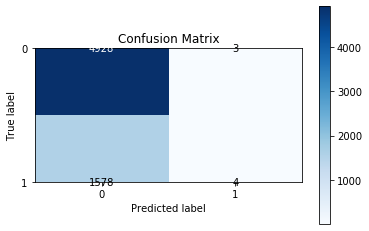

In [118]:
import scikitplot as skplt

%matplotlib inline 

preds = model.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, preds)
plt.show()

In [119]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.7572547213265776